<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#[Profesores:-Steven-Van-Vaerenbergh,-Rodrigo-G.-Manzanas,-Joaquín-Bedia-y-Sixto-Herrera]" data-toc-modified-id="[Profesores:-Steven-Van-Vaerenbergh,-Rodrigo-G.-Manzanas,-Joaquín-Bedia-y-Sixto-Herrera]-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>[Profesores: Steven Van Vaerenbergh, Rodrigo G. Manzanas, Joaquín Bedia y Sixto Herrera]</a></span></li></ul></li><li><span><a href="#Introducción:-Reducción-de-la-Dimensión" data-toc-modified-id="Introducción:-Reducción-de-la-Dimensión-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introducción: Reducción de la Dimensión</a></span><ul class="toc-item"><li><span><a href="#PCAs-(función-prcomp)" data-toc-modified-id="PCAs-(función-prcomp)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>PCAs (función <a href="https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/prcomp" target="_blank">prcomp</a>)</a></span></li></ul></li><li><span><a href="#Tarea-2.-Problemas-de-Clasificación---Reducción-de-la-Dimensión" data-toc-modified-id="Tarea-2.-Problemas-de-Clasificación---Reducción-de-la-Dimensión-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tarea 2. Problemas de Clasificación - Reducción de la Dimensión</a></span><ul class="toc-item"><li><span><a href="#Punto-1-(3-puntos):" data-toc-modified-id="Punto-1-(3-puntos):-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Punto 1 (3 puntos):</a></span></li><li><span><a href="#Punto-2-(3-puntos):" data-toc-modified-id="Punto-2-(3-puntos):-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Punto 2 (3 puntos):</a></span></li><li><span><a href="#Punto-3-(2-puntos):" data-toc-modified-id="Punto-3-(2-puntos):-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Punto 3 (2 puntos):</a></span></li><li><span><a href="#Punto-4-(2-puntos):" data-toc-modified-id="Punto-4-(2-puntos):-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Punto 4 (2 puntos):</a></span></li></ul></li></ul></div>

# Minería de Datos (Master en Data Science, UIMP-UC) 
### [Profesores: Steven Van Vaerenbergh, Rodrigo G. Manzanas, Joaquín Bedia y Sixto Herrera]


## Introducción: Reducción de la Dimensión

En la presente tarea trabajaremos con datos de variables climáticas los cuales por lo general presentan una alta auto-correlación espacial, rangos muy diferenciados y correlación entre variables, entre otros "problemas" citados a lo largo del curso.

Como habéis visto en las sesiones de Reducción de la Dimensión con Técnicas No Lineales, estos métodos suelen ser un pre-proceso habitualmente aplicado para resolver dichos problemas. Es por ello que en parte de la presente tarea exploraremos dichas técnicas, sea en su versión lineal (PCAs) o no lineal (KPCAs). Para ello, en esta subsección introduciremos brevemente las funciones en R que aplican ambos métodos.

### PCAs (función [prcomp](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/prcomp))

El análisis de componentes principales (PCAs) está implementado en R a través de la función `prcomp` (`?prcomp`). Veamos como hacer uso de dicha función:

In [ ]:
install.packages("readr")

In [ ]:
library("readr")
mnist_data <- read_csv("./train.csv")
nrows <- 1000 # set number of rows to include. Max = 42000
PCA1 <- prcomp(mnist_data[1:nrows,(2:ncol(mnist_data))], center = TRUE, scale. = FALSE) # PCA with R
str(PCA1)

Como vemos la función devuelve un `data.frame` con los siguientes elementos:

 * `sdev`: Se corresponde con la desviación estándar asociada a cada componente principal.
 * `rotation`: Es la matriz de cambio de base, desde el espacio original al espacio de las CPs.
 * `center`: Es el vector de medias de las variables originales.
 * `scale`: Es el vector de desviaciones estándar de las variables originales. Junto con `center` son los elementos aplicados para normalizar las variables orginales.
 * `x`: Es la matriz con las coordenadas de los diferentes elementos de la muestra en el espacio de las CPs. En un modelo que utilice CPs serán, por tanto, las nuevas variables de entrada.

Una vez hemos obtenido las PCs y entrenado un modelo, para aplicar éste a nuevos datos (test) deberemos reproyectar los nuevos datos al espacio de las PCs con la función `predict`:

In [109]:
PCAtest <- predict(PCA1, newdata = mnist_data[1001:2000,(2:ncol(mnist_data))])

# <font color='pink'> ---------------------------------------------------------------------------

En el recurso `07 Reducción de la dimensión` incluido en el Moodle de la asignatura tienes toda la información detallada a este respecto.


## Tarea 2. Problemas de Clasificación - Reducción de la Dimensión

En la presente tarea consideraremos el dataset `meteo.csv`, que podéis descargaros en el GitHub dedicado a este Máster ([meteo.csv](https://github.com/SantanderMetGroup/Master-Data-Science/blob/master/Data_mining/datasets/meteo.csv.)) y que ha sido utilizado en diferentes sesiones prácticas. Dicho dataset contiene en la primera columna el valor de precipitación observado en Lisboa en el periodo 1979-2008 mientras que en las restantes contiene los valores observados de diferentes variables atmosféricas en 40 puntos que cubren aproximadamente la Península Ibérica. Dichas variables serán los `predictores` del modelo mientras que la precipitación será nuestra variable objetivo. En particular los predictores son:

* Altura geopotencial en 500 hPa (columnas 2:41),
* Temperatura del aire en 850 hPa (columnas 42:81), 700 hPa (columnas 82:121) y 500 hPa (columnas 122:161), 
* Temperatura del aire en superficie (columnas 162:201),
* Humedad específica del aire en 850 hPa (columnas 202:241) y 500 hPa (columnas 242:281) y 
* Presión al nivel del mar (columnas 282:321)

Para establecer el problema de clasificación consideraremos dos umbrales de discretización, 1 mm y 20 mm, que definen la ocurrencia de precipitación (Wet days) y de precipitaciones intensas (Very heavy precipitation days), respectivamente. Puedes consultar más detalles de la definición en la web de [ECA&D](https://www.ecad.eu//indicesextremes/indicesdictionary.php).

Para el desarrollo de la tarea se permitirá el uso de todo el material incluido en el Moodle de las asignatura así como el desarrollado por el alumno durante la realización de las prácticas.

La entrega consisitirá de un notebook de Jupyter ó un R-MarkDown, junto con el archivo html que éste genera. Ambos ficheros se entregarán a través del Moodle de la asignatura en la tarea correspondiente.

### Punto 1 (3 puntos):

Considerad la serie de precipitación discretizada a partir del valor 1 mm, que es el estándar definido para establecer los días en que ha llovido. El objetivo de este apartado es predecir la ocurrencia de precipitación en Lisboa a partir de los predictores originales. Para ello consideraremos el método `KNN`. Dividir la muestra en dos subconjuntos, el primero (20 primeros años) lo utilizaremos para calibrar el modelo y obtener su configuración óptima, mientras que el segundo (10 últimos años) lo utilizaremos como test independiente de cara a comparar diferentes métodos.

* Obtened el valor óptimo de `K` en cada rastreando valores entre 1 y 15, ¿cambia el valor óptimo si normalizamos las variables originales (`? scale`)? En base a los resultados obtenidos, ¿considerarías las variables originales o normalizadas? En base al coste computacional del entrenamiento ¿consideras cierto que el método `KNN` se ve muy afectado por la dimensionalidad del espacio de trabajo?
* Para la configuración óptima calibrada con el conjunto de entrenamiento realizad la predicción sobre el conjunto de test y estimad los errores cometidos sobre este conjunto.

`Nota 1:` en principio es posible trabajar con el dataset completo sin seleccionar un subconjunto pero si surge algún problema de memoria podéis considerar únicamente los primeros 10 años (~3650 filas).

`Nota 2:` usad las herramientas gráficas vistas durante la práctica para ilustrar los resultados y las conclusiones obtenidas.

In [17]:
library(dplyr)
library(readr)
library(class)
library(caret)

In [18]:
# Loading data
meteo_data <- read_csv("./meteo.csv")
# str(meteo_data)
# head(data, 10)

New names:
* `` -> `...1`
Rows: 10958 Columns: 322
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (322): ...1, y, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, ...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [19]:
# Categorical variable and dataset adjustments
meteo_data <- meteo_data[, -1]
meteo_data$y <- ifelse(meteo_data$y >= 1, 1, 0)
meteo_data$y <- as.factor(meteo_data$y)
meteo_data <- meteo_data %>% select(y, everything()) # Move the target column to the first position

In [20]:
## train/test partition

num_rows <- nrow(meteo_data)

train_size <- round(num_rows * (20 / 30))
test_size <- num_rows - train_size

indtrain <- 1:train_size # First 20 years
indtest <- (train_size + 1):num_rows # Last 10 years
data.train <- meteo_data[indtrain,] 
data.test <- meteo_data[indtest,]
dim(data.train)
dim(data.test)

[1] 7305  321

[1] 3653  321

### No normalization

In [21]:
# Define the range of K values
n.k <- 1:15

# Cross-validation setup
cv_control <- trainControl(method = "cv", number = 5)  # 5-fold Cross Validation

# Train KNN model with Cross-Validation (without normalizing predictors)
set.seed(123)
knn_cv_no_norm <- train(y ~ ., data = data.train, 
                        method = "knn", 
                        trControl = cv_control, 
                        tuneGrid = data.frame(k = n.k))

In [22]:
best_k_no_norm <- knn_cv_no_norm$bestTune$k

In [23]:
# Predict using the best K
start_time_no_norm <- Sys.time()
set.seed(123)
pred_no_norm <- knn(train = meteo_data[indtrain, -1], 
                    test = meteo_data[indtest, -1],  
                    cl = meteo_data$y[indtrain],  
                    k = best_k_no_norm)
end_time_no_norm <- Sys.time()

# Compute Confusion Matrix for final predictions
conf_matrix_no_norm <- confusionMatrix(pred_no_norm, meteo_data$y[indtest])

print("Confusion Matrix - Without Normalization:")
print(conf_matrix_no_norm)

[1] "Confusion Matrix - Without Normalization:"
Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2793  365
         1  149  346
                                          
               Accuracy : 0.8593          
                 95% CI : (0.8476, 0.8704)
    No Information Rate : 0.8054          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4928          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9494          
            Specificity : 0.4866          
         Pos Pred Value : 0.8844          
         Neg Pred Value : 0.6990          
             Prevalence : 0.8054          
         Detection Rate : 0.7646          
   Detection Prevalence : 0.8645          
      Balanced Accuracy : 0.7180          
                                          
       'Positive' C

### Normalization

In [24]:
# Normalize predictor variables only
train_mean <- colMeans(data.train[, -1])
train_sd <- apply(data.train[, -1], 2, sd)

data.train.norm <- data.train
data.train.norm[, -1] <- scale(data.train[, -1], center = train_mean, scale = train_sd)

data.test.norm <- data.test
data.test.norm[, -1] <- scale(data.test[, -1], center = train_mean, scale = train_sd)

In [25]:
# Train KNN model with Cross-Validation (with normalization)
set.seed(123)
knn_cv_norm <- train(y ~ ., data = data.train.norm, 
                     method = "knn", 
                     trControl = cv_control, 
                     tuneGrid = data.frame(k = n.k))

In [26]:
best_k_norm <- knn_cv_norm$bestTune$k

In [27]:
# Predict using the best K
start_time_norm <- Sys.time()
set.seed(123)
pred_norm <- knn(train = data.train[, -1], 
                 test = data.test[, -1],  
                 cl = data.train.norm$y,  
                 k = best_k_norm)
end_time_norm <- Sys.time()

# Compute Confusion Matrix for final predictions
conf_matrix_norm <- confusionMatrix(pred_norm, data.test.norm$y)

print("Confusion Matrix - With Normalization:")
print(conf_matrix_norm)

[1] "Confusion Matrix - With Normalization:"
Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2780  346
         1  162  365
                                         
               Accuracy : 0.8609         
                 95% CI : (0.8493, 0.872)
    No Information Rate : 0.8054         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.5082         
                                         
 Mcnemar's Test P-Value : 4.688e-16      
                                         
            Sensitivity : 0.9449         
            Specificity : 0.5134         
         Pos Pred Value : 0.8893         
         Neg Pred Value : 0.6926         
             Prevalence : 0.8054         
         Detection Rate : 0.7610         
   Detection Prevalence : 0.8557         
      Balanced Accuracy : 0.7291         
                                         
       'Positive' Class : 0              

### Comparison

In [28]:
# Extract the best K from Cross-Validation
cat("Best K found with Cross-Validation (without normalization):", best_k_no_norm, "\n")
cat("Best K found with Cross-Validation (with normalization):", best_k_norm, "\n")

Best K found with Cross-Validation (without normalization): 15 
Best K found with Cross-Validation (with normalization): 9 


In [29]:
# Print execution times
cat("Execution time (without normalization):", end_time_no_norm - start_time_no_norm, "\n")
cat("Execution time (with normalization):", end_time_norm - start_time_norm, "\n")

Execution time (without normalization): 7.79091 
Execution time (with normalization): 7.741782 


In [30]:
# Errors evaluation
cat("Error (without normalization):", round(((1 - conf_matrix_no_norm$overall["Accuracy"]) * 100), 2), "% \n")
cat("Error (with normalization):", round(((1 - conf_matrix_norm$overall["Accuracy"]) * 100), 2), "% \n")

Error (without normalization): 14.07 % 
Error (with normalization): 13.91 % 


- <font color='green'> Does the optimal K change with normalization? </font>

    Yes, the optimal K differs between the two cases. The best K without normalization is 15, while with normalization it is 9. Since KNN is a distance-based algorithm, normalization affects the scale of variables, influencing the selection of the optimal K. Normalization ensures that all predictors contribute equally to distance calculations, preventing dominance from features with larger numerical ranges.

- <font color='green'> Do normalized variables improve performance? </font>

    Yes, normalization leads to a slight improvement in overall accuracy.

- <font color='green'> Does dimensionality affect computational cost? </font>

    The computational time for both cases is very similar. This suggests that in this case, dimensionality does not significantly affect computational cost. However, KNN is known to suffer from the curse of dimensionality, meaning that in a dataset with many more features, the computational burden would likely increase. 

- <font color='green'> What is the final misclassification error? </font>

    Error (without normalization): 16.03 % 

    Error (with normalization): 15.59 %

    This confirms that normalization slightly improves classification performance, particularly for the less frequent classes.

# <font color='pink'> ---------------------------------------------------------------------------

### Punto 2 (3 puntos):

Dados los posibles problemas asociados a la dimensionalidad del espacio de trabajo, en adelante consideraremos como predictores las Componentes Principales en lugar de las variables originales. Para ello, obtén las CPs a partir de los predictores originales del dataset `meteo.csv`. Recuerda la necesidad (o no) de estandarizar las variables para la obtención de las CPs (`Nota:` consultar la ayuda de la función scale -> `? scale`).

A continuación, volveremos a considerar la serie de precipitación discretizada a partir del valor 1 mm y predecir la ocurrencia de precipitación en Lisboa a partir de los predictores antes definidos a partir de las CPs. Para ello consideraremos, por un lado, las componentes principales obtenidas estandarizando los datos originales y, por otro lado, el método `KNN`. Dividir la muestra en dos subconjuntos, el primero (20 primeros años) lo utilizaremos para calibrar el modelo y obtener su configuración óptima, mientras que el segundo (10 últimos años) lo utilizaremos como test independiente de cara a comparar diferentes métodos.

* Considerad diferentes umbrales de varianza explicada y el número de PCs asociado (p.e. 40%, 60%, 80% y 90%) y obtened el valor óptimo de `K` en cada caso rastreando valores entre 1 y 15, ¿cómo cambia el valor óptimo? En base a los resultados obtenidos, ¿cuantas PCs considerarías para entrenar el modelo? (`Nota:` ver práctica de `KNN`)
* Para la configuración óptima calibrada con el conjunto de entrenamiento realizad la predicción sobre el conjunto de test y estimad los errores cometidos sobre este conjunto.

In [3]:
meteo_data <- read_csv("./meteo.csv")

New names:
* `` -> `...1`
Rows: 10958 Columns: 322
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (322): ...1, y, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, ...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
# Categorical variable
meteo_data <- meteo_data[, -1]
meteo_data$y <- ifelse(meteo_data$y >= 20, 1, 0)
meteo_data$y <- as.factor(meteo_data$y)
meteo_data <- meteo_data %>% select(y, everything()) # Move the target column to the first position

In [5]:
target <- meteo_data[[1]]
predictors <- meteo_data[, -1]

num_rows <- nrow(meteo_data)

train_size <- round(num_rows * (20 / 30))
test_size <- num_rows - train_size

train_predictors <- predictors[1:train_size, ]
test_predictors <- predictors[(train_size + 1):num_rows, ]

train_target <- target[1:train_size]
test_target <- target[(train_size + 1):num_rows]

train_target <- factor(train_target, levels = c(0, 1))
test_target <- factor(test_target, levels = c(0, 1))

In [6]:
# PCA train
pca_model <- prcomp(train_predictors, center = TRUE, scale. = TRUE)

# Transformation of training data, used to train the model
train_pca <- pca_model$x

# Projection of test data, used to test the future model
test_pca <- predict(pca_model, newdata = test_predictors)

In [7]:
cumulate_variance <- cumsum(pca_model$sdev^2) / sum(pca_model$sdev^2)
thresholds <- c(0.40, 0.60, 0.80, 0.90)
num_pcs <- sapply(thresholds, function(u) (which(cumulate_variance >= u)[1]))

cat("Number of PCs for each variance threshold:\n")
for (i in seq_along(num_pcs)) {
  cat(paste0("Threshold ", thresholds[i] * 100, "%: ", num_pcs[i], " PCs\n"))
}

Number of PCs for each variance threshold:
Threshold 40%: 1 PCs
Threshold 60%: 2 PCs
Threshold 80%: 4 PCs
Threshold 90%: 10 PCs


In [8]:
res <- list()

for (i in (seq_along(num_pcs))){
    
    n_pc <- num_pcs[i]
    cat("\nUsing", n_pc, "PCs for", thresholds[i] * 100, "% of variance")
    
    train_pca_for <- train_pca[, 1:n_pc, drop = FALSE]
    test_pca_for <- test_pca[, 1:n_pc, drop = FALSE]
    # cat("\nFirst few rows of train_pca_for:\n")
    # print(head(train_pca_for))

    cv_control <- trainControl(method = "cv", number = 10, selectionFunction = "best")  # 10-fold Cross Validation
    knn_model <- train(
        x = train_pca_for,
        y = train_target,
        method = "knn",
        tuneGrid = expand.grid(k = 1:15),
        trControl = cv_control,
    )

    best_k <- knn_model$results$k[which.max(knn_model$results$Accuracy)]

    cat("\nOptimal k =", best_k)

    set.seed(123)
    knn_pred <- knn(
        train = train_pca_for,
        test = test_pca_for,
        cl = train_target,
        k = best_k
    )

    conf_matrix <- confusionMatrix(
        factor(knn_pred, levels = levels(test_target)),
        test_target
    )

    best_accuracy <- conf_matrix$overall['Accuracy']

    # cat("\nConfusion Matrix for", thresholds[i] * 100, "% of variance:\n")
    # print(conf_matrix)

    cat("\nAccuracy:", round(best_accuracy * 100, 2), "%\n")

    res[[paste0("Variance_", thresholds[i] * 100, "%")]] <- list(
        num_pcs = n_pc,
        best_k = best_k,
        accuracy = best_accuracy,
        confusion_matrix = conf_matrix
    )

    rm(train_pca_for, test_pca_for, knn_model, knn_pred, conf_matrix)
    gc()

}


Using 1 PCs for 40 % of variance
Optimal k = 6
Accuracy: 97.48 %

Using 2 PCs for 60 % of variance
Optimal k = 9
Accuracy: 97.51 %

Using 4 PCs for 80 % of variance
Optimal k = 12
Accuracy: 97.54 %

Using 10 PCs for 90 % of variance
Optimal k = 12
Accuracy: 97.45 %


In [11]:
n_pc <- 4
k <- 12
train_pca <- pca_model$x[, 1:n_pc, drop = FALSE]
test_pca <- predict(pca_model, newdata = test_predictors)[, 1:n_pc, drop = FALSE]

In [12]:
set.seed(123)
knn_model <- knn(
    train = train_pca,
    test = test_pca,
    cl = train_target,
    k=k
)

conf_matrix <- confusionMatrix(knn_model, test_target)

In [13]:
print(conf_matrix)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3562   90
         1    0    1
                                          
               Accuracy : 0.9754          
                 95% CI : (0.9698, 0.9801)
    No Information Rate : 0.9751          
    P-Value [Acc > NIR] : 0.4855          
                                          
                  Kappa : 0.0212          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.00000         
            Specificity : 0.01099         
         Pos Pred Value : 0.97536         
         Neg Pred Value : 1.00000         
             Prevalence : 0.97509         
         Detection Rate : 0.97509         
   Detection Prevalence : 0.99973         
      Balanced Accuracy : 0.50549         
                                          
       'Positive' Class : 0               
                        

The results show that the optimal value of  k  increases with the number of PCs used in the model, eventually stabilizing at  k = 12  starting from 4 PCs (80% explained variance). The model accuracy improves slightly up to 4 PCs (80%) and then decreases marginally when using 10 PCs (90%). This suggests that adding more PCs does not necessarily enhance model performance, and beyond 4 PCs, no significant improvement is observed. Therefore, the optimal configuration for the model is using 4 PCs (80% explained variance) with  k = 12.
However, while the overall accuracy is high (97.54%), it could be misleading due to the highly imbalanced dataset. The model could be simply predicting “no precipitation” in most cases and still achieving a high accuracy.

The Kappa Statistic, which in this case is 0.0212 uggests that the model is not effective at distinguishing precipitation events from non-precipitation events.

# <font color='pink'> ---------------------------------------------------------------------------

### Punto 3 (2 puntos):

Repetid el experimento anterior considerando la precipitación discretizada a partir del valor 20 mm, que es el estándar definido para establecer los días en que ha llovido de forma intensa.

* ¿Cómo cambian los valores óptimos de `K` y de número de PCs? 
* ¿Cómo cambian los errores sobre el conjunto de test en este caso?
* En caso de existir diferentes significativas en ambos casos, ¿a qué crees que puede ser debido? ¿La frecuencia en la muestra del evento a predecir puede influir en la calidad de la predicción?

In [4]:
meteo_data <- read_csv("./meteo.csv")
meteo_data <- meteo_data[, -1]
meteo_data$y <- ifelse(meteo_data$y >= 20, 1, 0)

New names:
* `` -> `...1`
Rows: 10958 Columns: 322
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (322): ...1, y, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, ...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
target <- meteo_data[[1]]
predictors <- meteo_data[, -1]

num_rows <- nrow(meteo_data)

train_size <- round(num_rows * (20 / 30))
test_size <- num_rows - train_size

train_predictors <- predictors[1:train_size, ]
test_predictors <- predictors[(train_size + 1):num_rows, ]

train_target <- target[1:train_size]
test_target <- target[(train_size + 1):num_rows]

train_target <- factor(train_target, levels = c(0, 1))
test_target <- factor(test_target, levels = c(0, 1))

In [6]:
# PCA train
pca_model <- prcomp(train_predictors, center = TRUE, scale. = TRUE)

# Transformation of training data, used to train the model
train_pca <- pca_model$x

# Projection of test data, used to test the future model
test_pca <- predict(pca_model, newdata = test_predictors)

In [7]:
cumulate_variance <- cumsum(pca_model$sdev^2) / sum(pca_model$sdev^2)
thresholds <- c(0.40, 0.60, 0.80, 0.90)
num_pcs <- sapply(thresholds, function(u) which(cumulate_variance >= u)[1])

cat("Number of PCs for each variance threshold:\n")
for (i in seq_along(num_pcs)) {
  cat(paste0("Threshold ", thresholds[i] * 100, "%: ", num_pcs[i], " PCs\n"))
}

Number of PCs for each variance threshold:
Threshold 40%: 1 PCs
Threshold 60%: 2 PCs
Threshold 80%: 4 PCs
Threshold 90%: 10 PCs


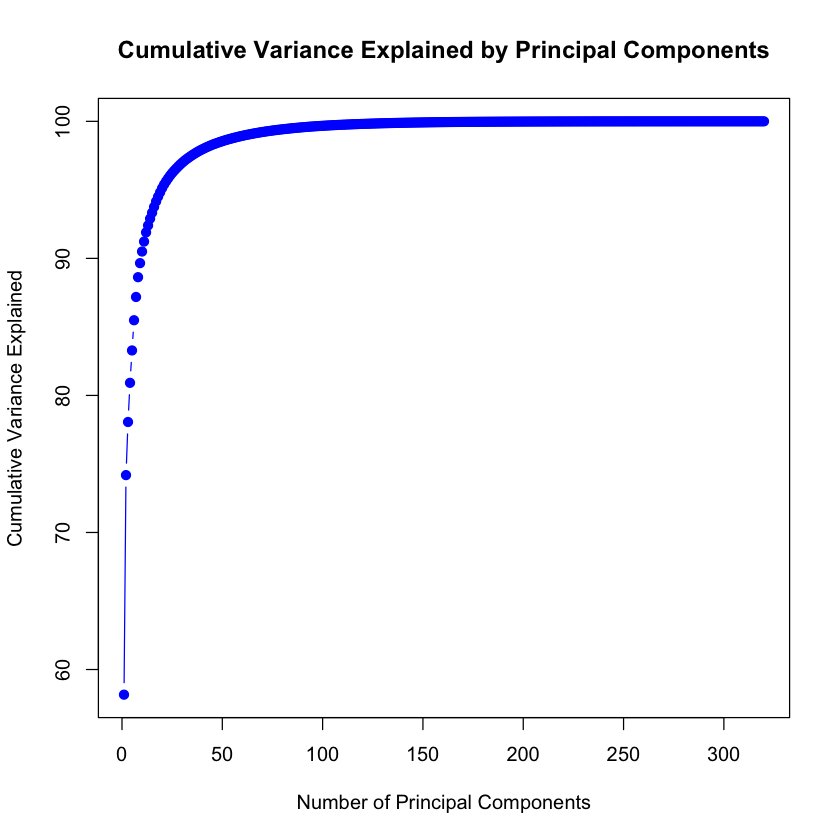

In [47]:
par(bg = "white")
plot(cumulate_variance * 100, type = "b", pch = 19, col = "blue",
     xlab = "Number of Principal Components", ylab = "Cumulative Variance Explained",
     main = "Cumulative Variance Explained by Principal Components")

In [8]:
res <- list()

for (i in (seq_along(num_pcs))){
    
    n_pc <- num_pcs[i]
    cat("\nUsing", n_pc, "PCs for", thresholds[i] * 100, "% of variance")
    
    train_pca_for <- train_pca[, 1:n_pc, drop = FALSE]
    test_pca_for <- test_pca[, 1:n_pc, drop = FALSE]
    # cat("\nFirst few rows of train_pca_for:\n")
    # print(head(train_pca_for))

    cv_control <- trainControl(method = "cv", number = 10, selectionFunction = "best")  # 10-fold Cross Validation
    knn_model <- train(
        x = train_pca_for,
        y = train_target,
        method = "knn",
        tuneGrid = expand.grid(k = 1:15),
        trControl = cv_control,
    )

    best_k <- knn_model$results$k[which.max(knn_model$results$Accuracy)]

    cat("\nOptimal k =", best_k)

    set.seed(123)
    knn_pred <- knn(
        train = train_pca_for,
        test = test_pca_for,
        cl = train_target,
        k = best_k
    )

    conf_matrix <- confusionMatrix(
        factor(knn_pred, levels = levels(test_target)),
        test_target
    )

    best_accuracy <- conf_matrix$overall['Accuracy']

    # cat("\nConfusion Matrix for", thresholds[i] * 100, "% of variance:\n")
    # print(conf_matrix)

    cat("\nAccuracy:", round(best_accuracy * 100, 2), "%\n")

    res[[paste0("Variance_", thresholds[i] * 100, "%")]] <- list(
        num_pcs = n_pc,
        best_k = best_k,
        accuracy = best_accuracy,
        confusion_matrix = conf_matrix
    )

    rm(train_pca_for, test_pca_for, knn_model, knn_pred, conf_matrix)
    gc()

}


Using 1 PCs for 40 % of variance


Optimal k = 8
Accuracy: 97.51 %

Using 2 PCs for 60 % of variance
Optimal k = 8
Accuracy: 97.48 %

Using 4 PCs for 80 % of variance
Optimal k = 13
Accuracy: 97.51 %

Using 10 PCs for 90 % of variance
Optimal k = 11
Accuracy: 97.48 %


In [9]:
n_pc <- 4
k <- 13
train_pca_model <- pca_model$x[, 1:n_pc, drop = FALSE]
test_pca_model <- predict(pca_model, newdata = test_predictors)[, 1:n_pc, drop = FALSE]

In [10]:
set.seed(123)
knn_model_20 <- knn(
    train = train_pca_model,
    test = test_pca_model,
    cl = train_target,
    k = k
)

conf_matrix <- confusionMatrix(knn_model_20, test_target)

In [11]:
print(conf_matrix)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3562   91
         1    0    0
                                          
               Accuracy : 0.9751          
                 95% CI : (0.9695, 0.9799)
    No Information Rate : 0.9751          
    P-Value [Acc > NIR] : 0.5278          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.9751          
         Neg Pred Value :    NaN          
             Prevalence : 0.9751          
         Detection Rate : 0.9751          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : 0               
                        

The model’s accuracy remains nearly the same regardless of the number of principal components (PCs) used. If we select 1 PC (40% explained variance), the model remains very simple, but it may lose important information that could help in classification. On the other hand, using 4 PCs (80% explained variance) provides the same accuracy (97.51%) while retaining more relevant information from the data. Thus, the optimal choice is to use 4 PCs (80% explained variance) with  k = 13 . This selection achieves the same accuracy as the 1-PC model and maintains sufficient explained variance to prevent excessive information loss, leading to a more reliable model.

Given the dataset’s imbalance, a potential improvement could involve undersampling the majority class (non-rainy days). This would help create a more balanced dataset, allowing the model to better capture the characteristics of the minority class (intense rainfall days) and improve classification performance.

# <font color='pink'> ---------------------------------------------------------------------------

### Punto 4 (2 puntos):

Considerando el número de PCs óptimo obtenido en el apartado anterior, predecid el conjunto de test utilizando en este caso la regresión logística como método de clasificación (`Nota:` ver `Práctica Clasificacion Lineal` en el Moodle de la asignatura de Estadística o en la de Minería de Datos). 

* Comparad los resultados obtenidos utilizando ambos métodos para la predicción de la ocurrencia de precipitación y de precipitación intensa (`Nota:` considerar, por ejemplo, la curva ROC para la comparación), ¿alguno de los métodos se comporta mejor que el otro de forma sistemática?

In [31]:
library(pROC)

In [34]:
best_n_pc = 4

train_pca_best <- train_pca[, 1:best_n_pc, drop = FALSE]
test_pca_best <- test_pca[, 1:best_n_pc, drop = FALSE]

In [35]:
set.seed(123)

logistic_model <- train(
    x = train_pca_best,
    y = train_target,
    method = "glm",
    family = binomial(link = "logit")
)

In [36]:
logistic_predictions <- predict(logistic_model, test_pca_best)
logistic_conf_matrix <- confusionMatrix(logistic_predictions, test_target)

cat("\nAccuracy Regression:", round(logistic_conf_matrix$overall["Accuracy"] * 100, 2), "%\n")
print(logistic_conf_matrix)


Accuracy Regression: 97.45 %
Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3560   91
         1    2    0
                                          
               Accuracy : 0.9745          
                 95% CI : (0.9689, 0.9794)
    No Information Rate : 0.9751          
    P-Value [Acc > NIR] : 0.6106          
                                          
                  Kappa : -0.0011         
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9994          
            Specificity : 0.0000          
         Pos Pred Value : 0.9751          
         Neg Pred Value : 0.0000          
             Prevalence : 0.9751          
         Detection Rate : 0.9745          
   Detection Prevalence : 0.9995          
      Balanced Accuracy : 0.4997          
                                          
       'Positive' Class : 0          

In [40]:
logistic_prob <- predict(logistic_model, test_pca_best, type = "prob")[,2]

roc_logistic <- roc(test_target, logistic_prob)
auc_logistic <- auc(roc_logistic)

knn_prob_10 <- as.numeric(pred_norm)
knn_prob_20 <- as.numeric(knn_model_20) 

roc_knn_20 <- roc(test_target, knn_prob_20)
auc_knn_20 <- auc(roc_knn_20)

roc_knn_10 <- roc(test_target, pred_norm)
auc_knn_10 <- auc(roc_knn_10)

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



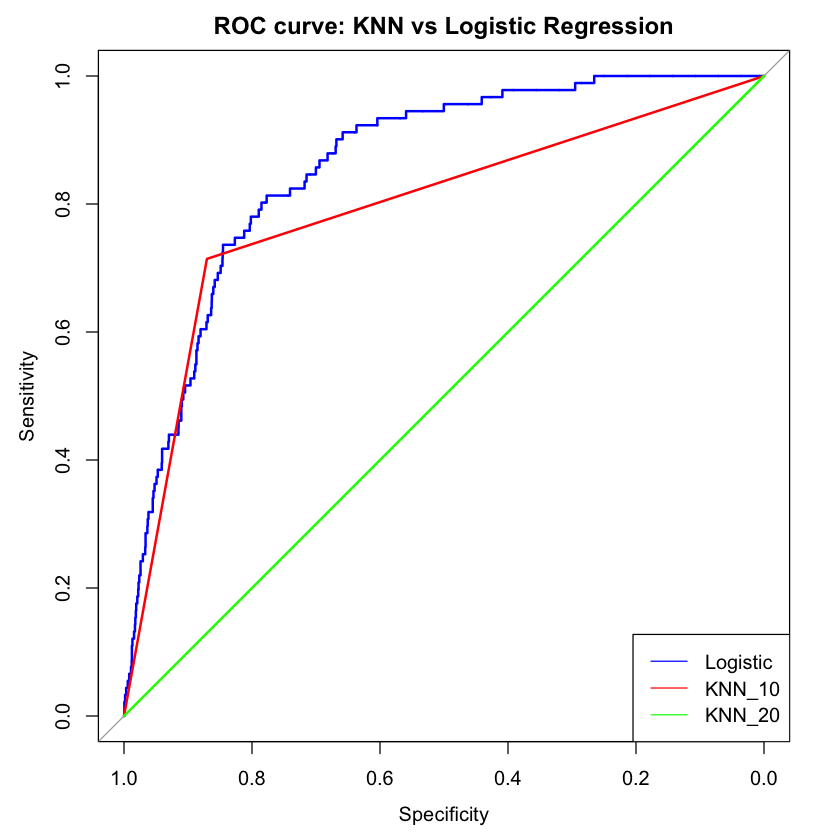

In [42]:
par(bg = "white")
plot(roc_logistic, col = "blue", main = "ROC curve: KNN vs Logistic Regression")
plot(roc_knn_10, col = "red", add = TRUE)
plot(roc_knn_20, col = "green", add = TRUE)
legend("bottomright", legend = c("Logistic", "KNN_10", "KNN_20"), col = c("blue", "red", "green"), lty = 1)

In [44]:
cat("\nAUC Logistic Regression:", round(auc_logistic, 3))
cat("\nAUC KNN:", round(auc_knn_10, 3))
cat("\nAUC KNN:", round(auc_knn_20, 3))


AUC Logistic Regression: 0.859
AUC KNN: 0.792
AUC KNN: 0.5

Both models achieve similar accuracy (~97.5%), but this metric is misleading due to the highly imbalanced dataset. The balanced accuracy is ~50% for both, indicating that neither model effectively predicts intense rainfall. The ROC curve and AUC values suggest that logistic regression (AUC = 0.859) systematically outperforms KNN (AUC = 0.792 for  k = 10 , 0.5 for  k = 20), showing better class separation. However, both models fail to correctly classify intense rainfall events, as evidenced by their low specificity.